In [2]:
import mne
import picard

In [16]:
import mne
import picard
raw = mne.io.read_raw_edf(
    mne.datasets.eegbci.load_data(subject=sub, runs=(1,))[0], preload=True
)
mne.datasets.eegbci.standardize(raw)  # set channel names
montage = mne.channels.make_standard_montage("standard_1005")
raw.set_montage(montage)
raw.filter(l_freq=1.0, h_freq=None)


Extracting EDF parameters from C:\Users\ABC\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S002\S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 529 samples (3.306 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Measurement date,"August 12, 2009 16:15:00 GMT"
Experimenter,Unknown
Participant,X
Digitized points,67 points
Good channels,64 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,160.00 Hz
Highpass,1.00 Hz
Lowpass,80.00 Hz


In [17]:
    # Run ICA
ica = mne.preprocessing.ICA(
    n_components=15, method="picard", max_iter="auto", random_state=97
)
ica.fit(raw)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 1.2s.


Method,picard
Fit parameters,max_iter=500
Fit,49 iterations on raw data (9760 samples)
ICA components,15
Available PCA components,64
Channel types,eeg
ICA components marked for exclusion,—


Creating RawArray with float64 data, n_channels=15, n_times=9760
    Range : 0 ... 9759 =      0.000 ...    60.994 secs
Ready.


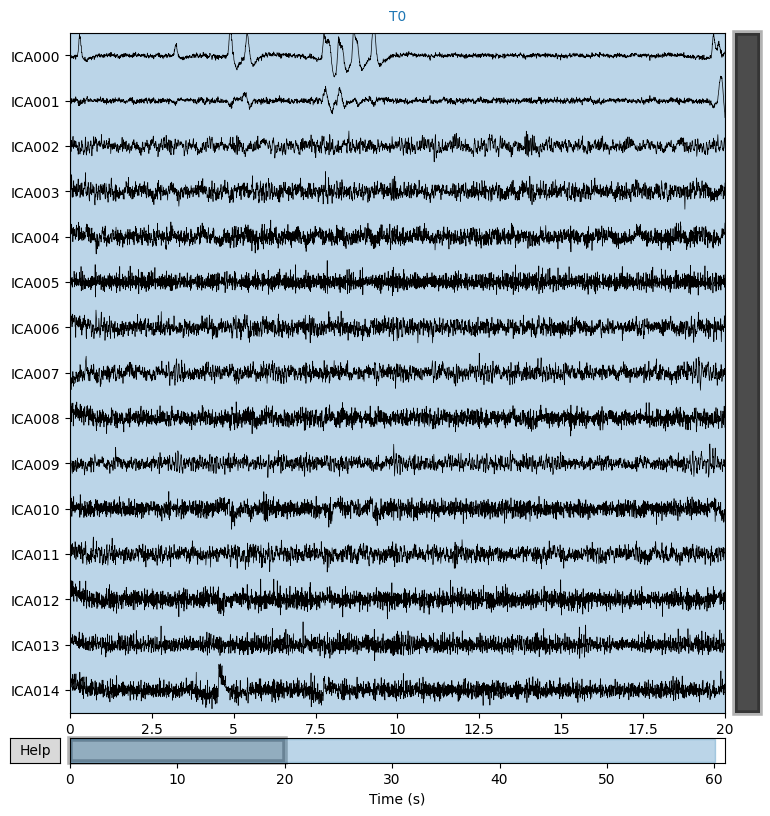

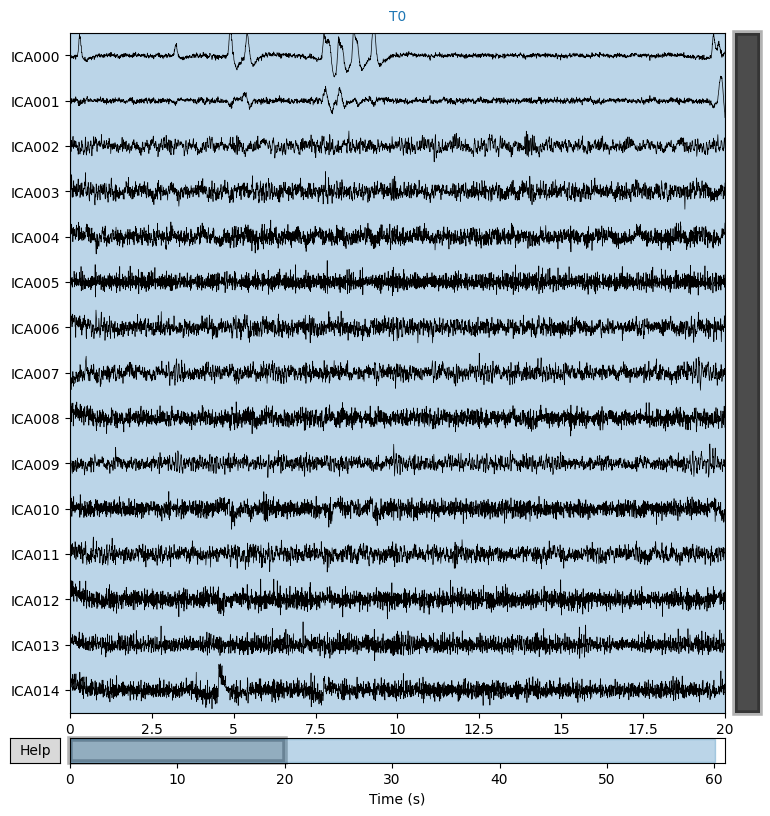

In [18]:
ica.plot_sources(raw)

In [9]:
muscle_idx_auto, scores = ica.find_bads_muscle(raw)

Effective window size : 12.800 (s)


In [15]:
print(scores)

[1.80301205e-02 5.15964813e-02 4.52931889e-05 4.57697915e-02
 3.57001076e-02 8.71240126e-01 1.22644412e-02 5.46349291e-03
 7.71295873e-03 1.50704458e-03 7.21123926e-01 2.69070471e-02
 6.46354817e-01 7.83879392e-01 7.18704104e-01]


In [11]:
print(muscle_idx_auto)

[5, 10, 12, 13, 14]


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


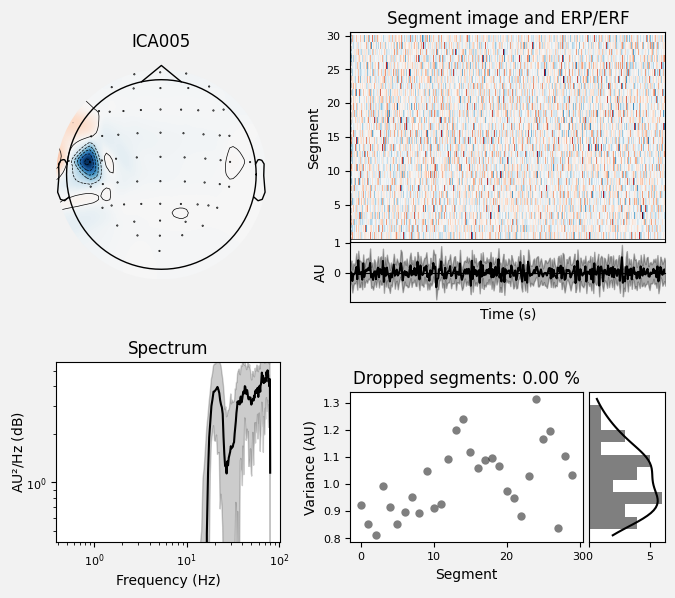

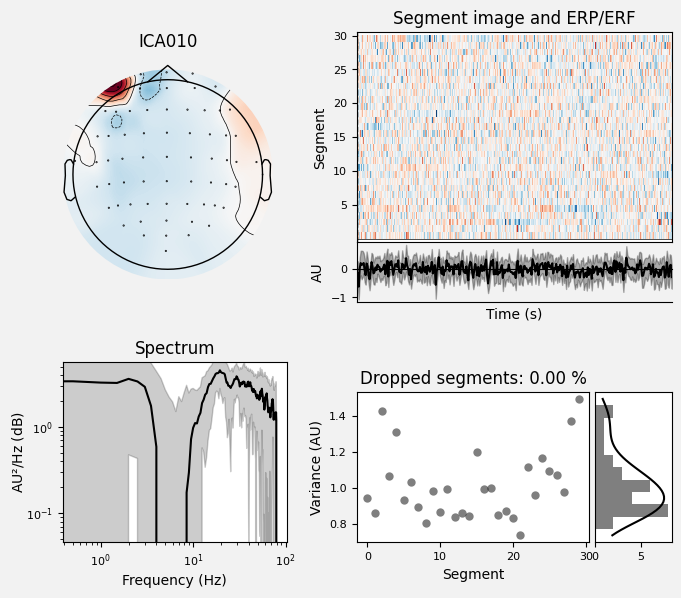

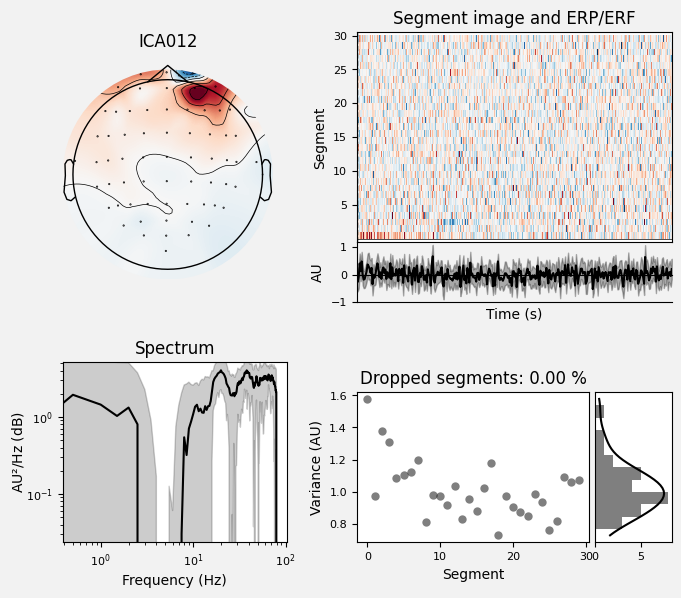

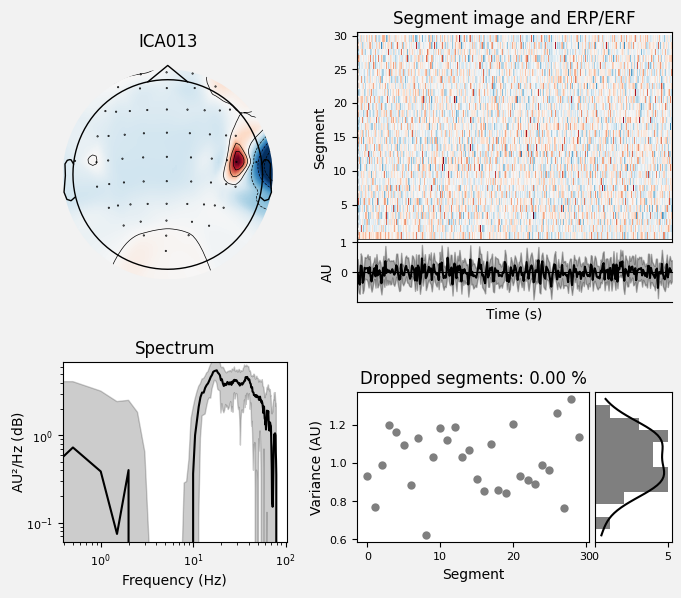

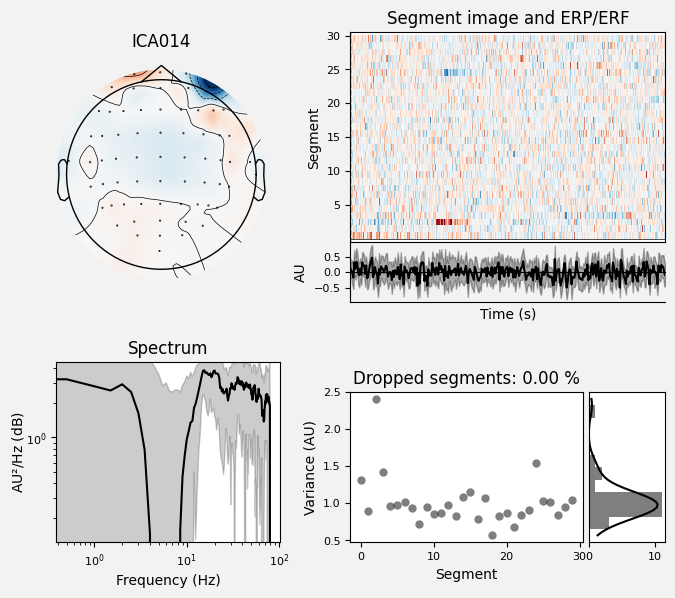

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [10]:
ica.plot_properties(raw, picks=muscle_idx_auto, log_scale=True)

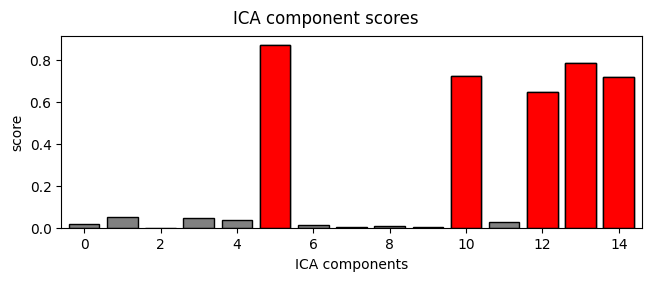

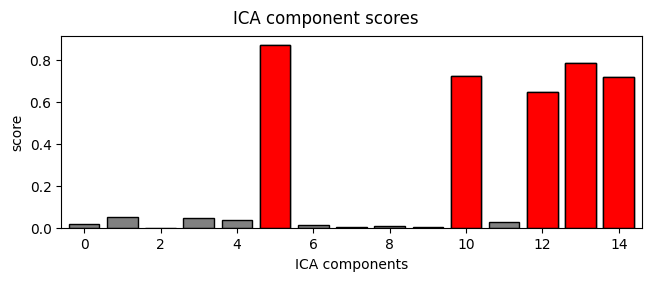

In [13]:
ica.plot_scores(scores, exclude=muscle_idx_auto)

In [14]:
print(
       # f"Manually found muscle artifact ICA components:      {muscle_idx}\n"
        "Automatically found muscle artifact ICA components: "
        f"{muscle_idx_auto}"
    )


Automatically found muscle artifact ICA components: [5, 10, 12, 13, 14]
